### Pre Processing the Data 
- The data needs to be -
    - Expanded for the abbreviations 
    - Lemmatization would be better 
    - TfIdf for the vectorization 
    - Fit the model on the data 
    - Test the model 

In [2]:
import pandas as pd 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings  
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

warnings.simplefilter("ignore")

- Get the wordnet corpus and other stuff

In [5]:
import nltk 

In [2]:
nltk.download("wordnet")
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/harshit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/harshit/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/harshit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/harshit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Preprocessing

In [3]:
data = pd.read_csv("final_dataframe.csv", low_memory = False)
data.drop(["Unnamed: 0"], axis = 1, inplace = True)
data.head(n = 4)

,url,text,class
0,https://www.geeksforgeeks.org/machine-learning/,Machine Learning - GeeksforGeeks Skip to conte...,Machine Learning
1,https://machinelearningmastery.com/start-here/,Just a moment... machinelearningmastery.com Ch...,Machine Learning
2,https://www.techtarget.com/searchenterpriseai/...,What Is Machine Learning and Why Is It Importa...,Machine Learning
3,https://azure.microsoft.com/en-us/services/mac...,Azure Machine Learning - ML as a Service | Mic...,Machine Learning


### Class Distribution

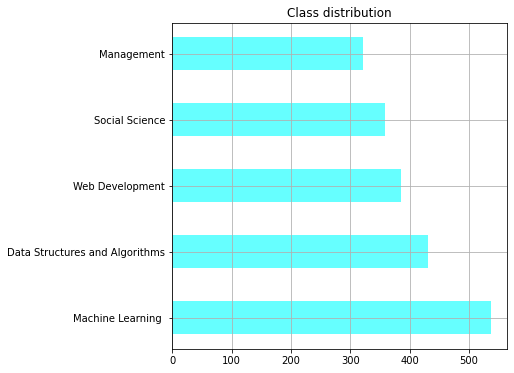

In [6]:
class_labels = data['class'].value_counts()
plt.figure(figsize = (6,6))
plt.title("Class distribution")
plt.barh(y = list(class_labels.keys()), width = class_labels.values, height = 0.5, color = 'cyan', alpha = 0.6)
plt.grid()

### Word Visualizer
- We can clearly see that relevant wordsets are present in the text strings of the specified classes
- Moreover, the more prominent words are present in a greater frequency and would help the model to identify the class labels based on these keywords better

In [31]:
topics = list(class_labels.keys())
topics

['Machine Learning ',
 'Data Structures and Algorithms',
 'Web Development',
 'Social Science',
 'Management']

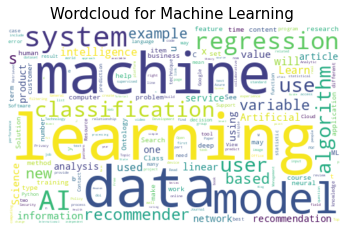

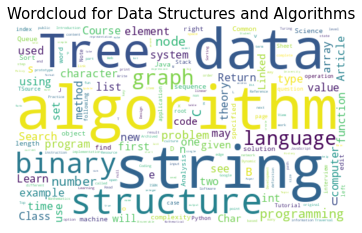

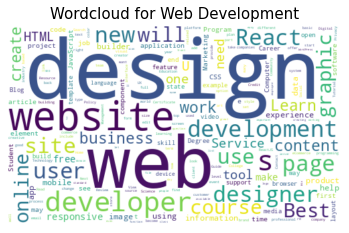

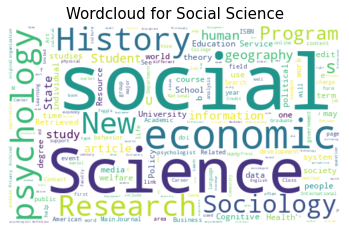

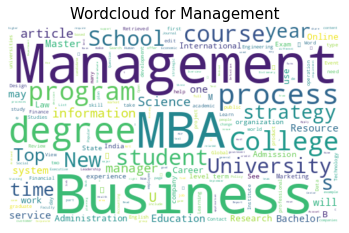

In [42]:
for label in topics:
    #Creating the text variable
    text = " ".join([str(x) for x in data.loc[data["class"] == label]["text"] ])

    # Creating word_cloud with text as argument in .generate() method
    word_cloud = WordCloud(collocations = False, background_color = 'white', margin = 5,width = 500, height = 300).generate(text)
    # Display the generated Word Cloud
    plt.title(f"Wordcloud for {label}", fontsize = 15)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### Pre - Processing

In [6]:
punctuation='["\'?,\.]' # I will replace all these punctuation with ''
abbr_dict={
    "what's":"what is",
    "what're":"what are",
    "where's":"where is",
    "where're":"where are",
    "i'm":"i am",
    "we're":"we are",
    "it's":"it is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",
    "i've":"i have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",
    "i'll":"i will",
    "it'll":"it will",
    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not",
    "you're" : "you are",
    punctuation:'',
    '\s+':' ', # replace multi space with one single space
}

stop_words = nltk.corpus.stopwords.words("english")
print("Some stop words : ", stop_words[:5])
stop_words = set([s.lower() for s in stop_words])

Some stop words :  ['i', 'me', 'my', 'myself', 'we']


In [7]:
stop_words 

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [99]:
def remove_stop_words(text):
    word_tokens = word_tokenize(text)
    
    # remove stopwords and special characters 
    filtered = ""
    for w in word_tokens:
        first_cond = w not in stop_words 

        # if all chars are not alnum, remove 
        count = 0 
        for c in w:
            if c.isalnum():
                break 
            count+=1 
        second_cond = not (count == len(w))

        if first_cond and second_cond:
            filtered+= w + " "

    return filtered.strip()

In [104]:
def process_data(data):
    # Convert to lower case
    
    data.text =data.text.str.lower() 
    
    # convert to string 
    data.text = data.text.astype(str)
    
    # replace abbreviations 
    data.text.replace(abbr_dict,regex=True,inplace=True)
    
    # remove stop words 
    data.text = data.text.apply(remove_stop_words)
    
    #apply lemmatization
    lemmatizer = WordNetLemmatizer()
    
    # process the text
    data['processed_text'] = data['text'].apply(lambda x : ' '.join([lemmatizer.lemmatize(y) for y in x.split()]))
    
    return data

In [105]:
processed = process_data(data)

In [112]:
processed = processed.drop(["text"], axis = 1)

In [113]:
processed.to_csv("processed_text_df.csv")